# The Battle of the Neighborhoods - Week 1

## Introduction & Business Problem :

### Problem Background:
New York City is the most populous city in the United States. It is diverse and is the financial capital of USA. It is a multicultural city. It is a dream place for gourmet to seek delicious cuisine. Its food culture includes an array of international cuisines influenced by the city's immigrant history. 

As it is highly developed city so cost of doing business is also one of the highest. Thus, the market is highly competitive, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market.


### Problem Description:
New York City attracts many to start their business in the food industry. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

Central and Eastern European immigrants, especially Jewish immigrants introduced bagels, cheesecake, hot dogs to New York. Italian immigrants brought New York-style pizza and Italian cuisine. Jewish immigrants and Irish immigrants is famoused by making pastrami and corned beef. Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city. 4,000 license were issued to mobile food vendors by the city. Middle Eastern foods such as falafel and kebabs examples of modern New York street food. It is famous for not just Pizzerias, Cafe's but also for fine dining Michelin starred restaurants.The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin.
it is impractical to run an analysis for each type of restaurant. Based on the maximum total numbers among these restaurants, I choose Pizza Place for the following report. The study of other types of restaurants can be conducted with the same method.

### Data Preparation 
Scope of this project
To recommend the correct location for Company A to locate and recommend to the management which neighborhood of New York city will be best choice to start a restaurant. The Management also expects to understand the rationale of the recommendations made.

Success Criteria:
The success criteria of the project will be a good recommendation of borough/Neighborhood choice to Foodie Company  based on Lack of such restaurants in that location and nearest suppliers of ingredients.

We will be using the below datasets to resturant business in New York city

Data 1 : Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

This dataset exists for free on the web. Link to the dataset is : https://geo.nyu.edu/catalog/nyu_2451_34572

Data 2 : Second data which will be used is the DOHMH Farmers Markets and Food Boxes dataset. In this we will be using the data of Farmers Markets.

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

Website-https://www.grownyc.org/greenmarketco/foodbox


Data 3 : For the below analysis we will get data from wikipedia as given below :

New York Population
New York City Demographics
Cuisine of New York city
https://en.wikipedia.org/wiki/New_York_City
https://en.wikipedia.org/wiki/Economy_of_New_York_City
https://en.wikipedia.org/wiki/Portal:New_York_City
https://en.wikipedia.org/wiki/Cuisine_of_New_York_City
https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

Data 4 : New York city geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in New York City. The below is image of the Foursquare API data.

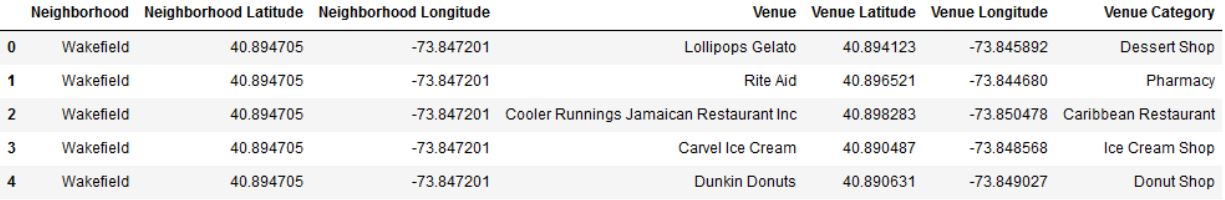

# The Battle of the Neighborhoods - Week 2

## Methodology and Exploratory Data Analysis


In [15]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans


Solving environment: done

# All requested packages already installed.



In [18]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [47]:
CLIENT_ID = 'HTEI3RFH5DTZHU5XWNSE4BIQYPMNB1MDNXPID3O04K303IQV' # your Foursquare ID
CLIENT_SECRET = 'SUYEQBXTGB4QKND0IYAWYMQUXDR451LPGQQAR1PEWATXQQC5' # your Foursquare Secret
VERSION = '20200415' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: HTEI3RFH5DTZHU5XWNSE4BIQYPMNB1MDNXPID3O04K303IQV


In [61]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data
ny_data = get_new_york_data()
ny_data.head()




,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
ny_data.shape

(306, 4)

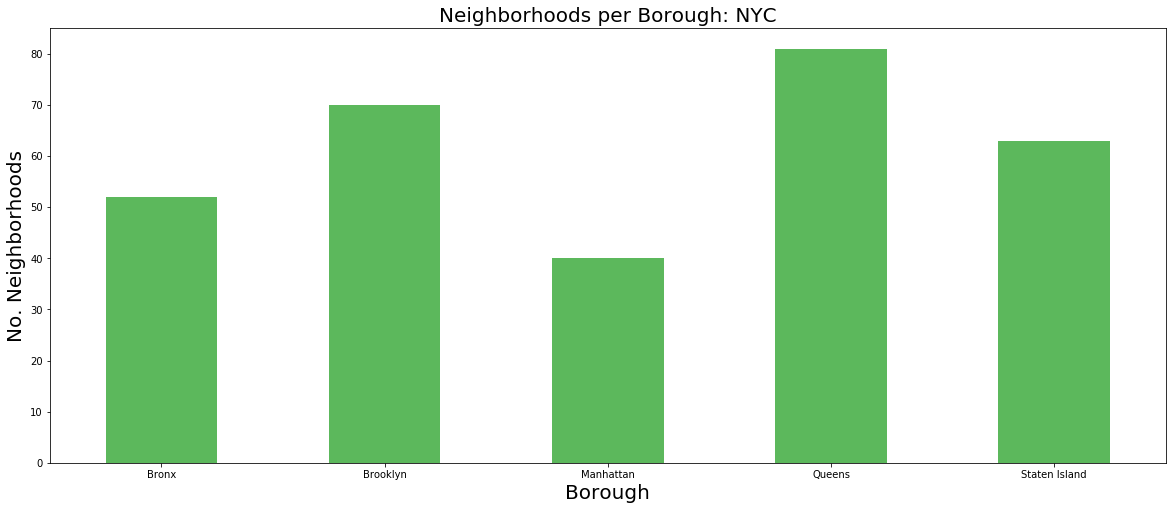

In [20]:
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(20,8), color='#5cb85c')
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 20)
plt.ylabel('No. Neighborhoods',fontsize = 20)
plt.xticks(rotation = 'horizontal')
plt.show()

In [62]:
# queens has most neighborhoods
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(ny_data),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    print(row)
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Resturants in Norwood, Bronx:0
['Bronx', '

In [63]:
italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
italian_rest_ny = pd.read_csv('italian_rest_ny_tocsv1.csv')
italian_rest_ny.tail()


,Unnamed: 0,Borough,Neighborhood,ID,Name
214,214,Queens,Sunnyside Gardens,5699aa86498ef437b2fd7102,Zio Luigi
215,215,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
216,216,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
217,217,Staten Island,Prince's Bay,4c091311a1b32d7f5efb96f0,Certo's Gourmet Foods & Caterers
218,218,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [65]:
italian_rest_ny.shape

(219, 5)

### How many restaurants in the top 6 neighborhoods

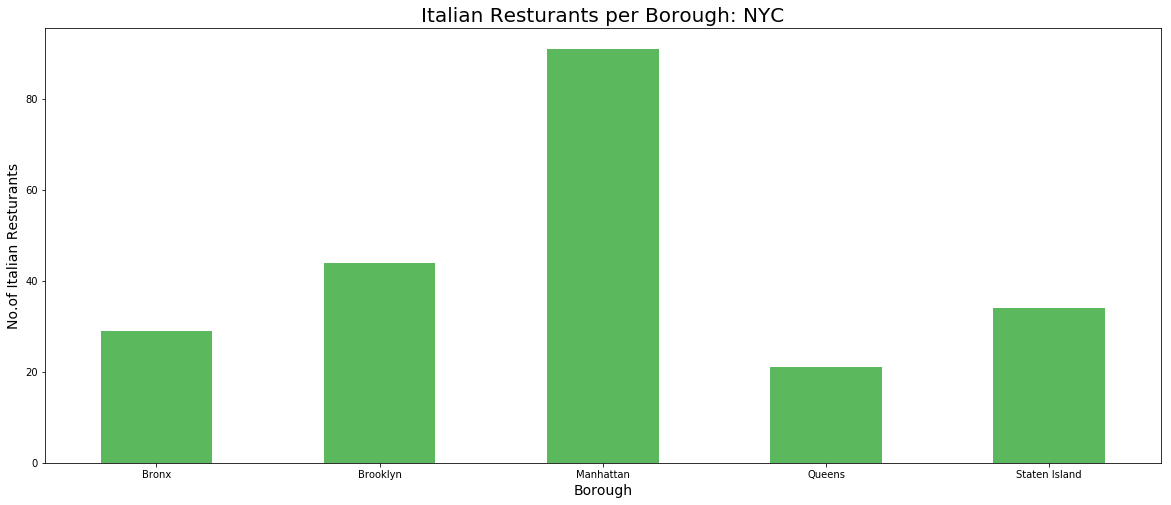

In [69]:
italian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(20,8), color = '#5cb85c')
plt.title('Italian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 14)
plt.ylabel('No.of Italian Resturants', fontsize=14)
plt.xticks(rotation = 'horizontal')
plt.show()

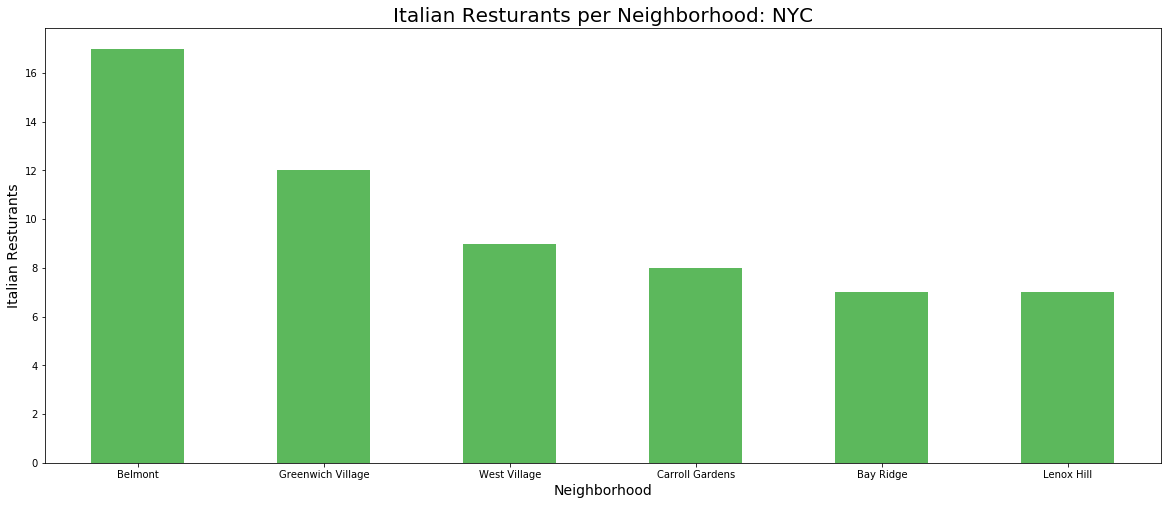

In [68]:
NOofNeigh = 6 # top number for graphing all the same past 6
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,8), color='#5cb85c')
plt.title('Italian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('Italian Resturants', fontsize=14)
plt.xticks(rotation = 'horizontal')
plt.show()

In [70]:
# because Neighborhood Belmont has most italian resturants
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

,Unnamed: 0,Borough,Neighborhood,ID,Name
5,5,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
6,6,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
7,7,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
8,8,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
9,9,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
10,10,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
11,11,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
12,12,Bronx,Belmont,4c9b9e7b9c663704b90463fd,Gerbasi Ristorante
13,13,Bronx,Belmont,4c79d294278eb713f6a05580,Cafe al Mercato
14,14,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant


In [87]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [89]:
import json # library to handle JSON files
with open('newyork_data.json') as json_data:
    newyork_data=json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [114]:
# Extract only the features section from json file
neighborhoods_data=newyork_data['features']


# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)



for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [115]:
Bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [116]:
def get_italian_restaurants(neighborhood_latitude,neighborhood_longitude):
    LIMIT = 100 # limit of number of venues returned by Foursquare API

    radius = 2000 # define radius
    # create URL
    url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d110941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT) 
    italian_rest_stats_ny.info=[]
    results = requests.get(url).json()
    IRcount= len(results['response']['venues'])
    
    for i in range(IRcount):
        Irestaurant=results['response']['venues'][i]['name']
        IRList.append(Irestaurant)
    
    return italian_rest_stats_ny.info

In [117]:
def get_rating(venueid,neighborhood_latitude,neighborhood_longitude):
    venue_url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
    venueid,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude
    )
    
    venue_results = requests.get(venue_url).json()
    
    try:
        restaurant_rating = venue_results['response']['venue']['rating']
    except:
        restaurant_rating = 0
    
    restaurant_name = venue_results['response']['venue']['name']
    
    return restaurant_name, restaurant_rating

In [120]:
for row in range(Bronx_data.shape[0]):
    
    neighborhood_latitude = Bronx_data.loc[row, 'Latitude'] # neighborhood latitude value
    neighborhood_longitude = Bronx_data.loc[row, 'Longitude'] # neighborhood longitude value
    neighborhood_name = Bronx_data.loc[row, 'Neighborhood'] # neighborhood name

    italian_rest_stats_ny.info=[]
    
    # Get the list of restaurants in a particular neighborhood
    italian_rest_stats_ny.info=get_italian_restaurants(neighborhood_latitude,neighborhood_longitude)
    
    # The length of the restaurants list is obtained as count
    Bronx_data.loc[row, 'Count'] = int(len(IRList))
    
    # Random numpy method is used for generating ratings for each restaurants
    Rating=np.random.randint(low=0, high=10, size=len(IRList))
    
    # Average rating is calculated
    RatingAverage=np.mean(Rating)
    
    Bronx_data.loc[row, 'Average Rating'] = round(RatingAverage,2)
    
    # The restaurants are grouped by ratings and the counts are derived in each group
    HighRatings=0
    LowRatings=0
    MidRatings=0
    
    for i in Rating:
        if i >= 7:
            HighRatings+=1
        elif i >= 4:
            MidRatings+=1
        else:
            LowRatings+=1
    
    Bronx_data.loc[row, 'High Rated Total'] = HighRatings
    Bronx_data.loc[row, 'Mid Rated Total'] = MidRatings
    Bronx_data.loc[row, 'Low Rated Total'] = LowRatings
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude,Count,Average Rating,High Rated Total,Mid Rated Total,Low Rated Total
0,Bronx,Wakefield,40.894705,-73.847201,1257.0,4.22,331.0,375.0,551.0
1,Bronx,Co-op City,40.874294,-73.829939,1260.0,4.60,393.0,386.0,481.0
2,Bronx,Eastchester,40.887556,-73.827806,1261.0,4.51,374.0,376.0,511.0
3,Bronx,Fieldston,40.895437,-73.905643,1270.0,4.57,407.0,350.0,513.0
4,Bronx,Riverdale,40.890834,-73.912585,1281.0,4.49,387.0,371.0,523.0


In [122]:
# Let us drop the Borough column, since all rows are of Bronx Borough
Bronx_data=Bronx_data.drop('Borough',1)
Bronx_data.head()

,Neighborhood,Latitude,Longitude,Count,Average Rating,High Rated Total,Mid Rated Total,Low Rated Total
0,Wakefield,40.894705,-73.847201,1257.0,4.22,331.0,375.0,551.0
1,Co-op City,40.874294,-73.829939,1260.0,4.60,393.0,386.0,481.0
2,Eastchester,40.887556,-73.827806,1261.0,4.51,374.0,376.0,511.0
3,Fieldston,40.895437,-73.905643,1270.0,4.57,407.0,350.0,513.0
4,Riverdale,40.890834,-73.912585,1281.0,4.49,387.0,371.0,523.0


In [123]:
kclusters = 3

Bronx_grouped_clustering = Bronx_data.drop(['Neighborhood','Latitude','Longitude'],1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:52]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [124]:
Bronx_clustered = Bronx_data

# add clustering labels
Bronx_clustered['Cluster Labels'] = kmeans.labels_

Bronx_clustered.head()

,Neighborhood,Latitude,Longitude,Count,Average Rating,High Rated Total,Mid Rated Total,Low Rated Total,Cluster Labels
0,Wakefield,40.894705,-73.847201,1257.0,4.22,331.0,375.0,551.0,1
1,Co-op City,40.874294,-73.829939,1260.0,4.60,393.0,386.0,481.0,1
2,Eastchester,40.887556,-73.827806,1261.0,4.51,374.0,376.0,511.0,1
3,Fieldston,40.895437,-73.905643,1270.0,4.57,407.0,350.0,513.0,1
4,Riverdale,40.890834,-73.912585,1281.0,4.49,387.0,371.0,523.0,1


In [126]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bronx_clustered['Latitude'], Bronx_clustered['Longitude'], Bronx_clustered['Neighborhood'], Bronx_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Conclution

The Bronx has the least number of Italian restaurants per borough. However, of note, Belmont of The Bronx is the neighborhood in all of NYC with the most Italian Restaurants. After studying the Bronx's neighborhoods for Italian restaurants for our client. 